## $\text {Importing libraries}$

In [ ]:
import re
import torch
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.linalg import cholesky
from mpl_toolkits.mplot3d import Axes3D
# from filterpy.kalman import unscented_transform, MerweScaledSigmaPoints

In [ ]:
custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "gray"}
sns.set_style("darkgrid", rc = custom)

## $\text {Importing data}$

In [ ]:
path = '/content/Data_1.csv'
data = pd.read_csv(path, encoding='cp1251', sep=';')
data

<ipython-input-8-05d4373719cd>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding='cp1251', sep=';')


,Time,Height,Speed,Theta,Xi,Phi,Lambda,Radius,x_gpsk,y_gpsk,...,w_z_gpsk,x_mzsk,y_mzsk,z_mzsk,v_x_mzsk,v_y_mzsk,v_z_mzsk,w_x_mzsk,w_y_mzsk,w_z_mzsk
0,0.0,0.000000,10.000000,1.047198,1.570796,0.000000e+00,0.000000e+00,6.378182e+06,6.378137e+06,0.000000e+00,...,66.758728,0.000000e+00,0.000000,0.000000,3.061596e-16,8.660254,4.966493,-0.000799,110.257156,66.758728
1,0.01,0.086603,12.581952,1.042308,1.570799,7.839225e-09,4.800141e-25,6.378182e+06,6.378137e+06,3.061596e-18,...,100.363896,3.061596e-18,0.086603,0.049665,-7.988544e-06,9.762826,5.634081,-0.001363,165.252874,100.363896
2,0.02,0.195257,15.164135,1.038388,1.570801,1.778592e-08,-2.504977e-14,6.378182e+06,6.378137e+06,-1.597709e-07,...,134.382662,-1.597709e-07,0.195257,0.112682,-2.726516e-05,11.965312,6.973771,-0.002258,220.004101,134.382662
3,0.03,0.325909,17.746501,1.035115,1.570804,2.985434e-08,-8.549569e-14,6.378182e+06,6.378137e+06,-5.453033e-07,...,135.144857,-5.453033e-07,0.325909,0.189140,-5.313873e-05,14.162908,8.321734,-0.002917,219.551558,135.144857
4,0.04,0.478515,20.329018,1.032302,1.570806,4.405634e-08,-1.916775e-13,6.378182e+06,6.378137e+06,-1.222546e-06,...,135.794882,-1.222546e-06,0.478515,0.279116,-8.560460e-05,16.356343,9.676668,-0.003576,219.162123,135.794882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91993,919.93,2.887628,297.998237,-0.210617,1.562046,8.148877e-02,-2.719766e-04,6.378042e+06,6.357116e+06,-1.728987e+03,...,0.883233,-1.728987e+03,-21021.406765,515707.643139,2.564811e+00,-85.491900,283.451670,0.021231,-1.043882,0.883233
91994,919.94,2.266217,298.009768,-0.210641,1.562045,8.148923e-02,-2.719726e-04,6.378042e+06,6.357115e+06,-1.728961e+03,...,0.883600,-1.728961e+03,-21022.261737,515710.477700,2.565024e+00,-85.502335,283.460505,0.021236,-1.043135,0.883600
91995,919.95,1.644710,298.021302,-0.210666,1.562045,8.148968e-02,-2.719686e-04,6.378041e+06,6.357114e+06,-1.728936e+03,...,0.883967,-1.728936e+03,-21023.116812,515713.312349,2.565236e+00,-85.512762,283.469342,0.021240,-1.042385,0.883967
91996,919.96,1.023108,298.032836,-0.210690,1.562044,8.149014e-02,-2.719646e-04,6.378040e+06,6.357113e+06,-1.728910e+03,...,0.663158,-1.728910e+03,-21023.971992,515716.147086,2.565448e+00,-85.523182,283.478184,0.015932,-0.781415,0.663158


### $\text {Take only 4 columns that we need}$

In [ ]:
new_mzsk_coords = data[['Time', 'x_mzsk', 'y_mzsk', 'z_mzsk']].copy()
new_mzsk_coords

,Time,x_mzsk,y_mzsk,z_mzsk
0,0.0,0.000000e+00,0.000000,0.000000
1,0.01,3.061596e-18,0.086603,0.049665
2,0.02,-1.597709e-07,0.195257,0.112682
3,0.03,-5.453033e-07,0.325909,0.189140
4,0.04,-1.222546e-06,0.478515,0.279116
...,...,...,...,...
91993,919.93,-1.728987e+03,-21021.406765,515707.643139
91994,919.94,-1.728961e+03,-21022.261737,515710.477700
91995,919.95,-1.728936e+03,-21023.116812,515713.312349
91996,919.96,-1.728910e+03,-21023.971992,515716.147086


### $\text {Let`s trim our data to ger the correct values}$

In [ ]:
new_mzsk_coords = new_mzsk_coords.iloc[300:, :]
new_mzsk_coords

,Time,x_mzsk,y_mzsk,z_mzsk
300,2.99999999999998,-0.292588,975.534486,667.187240
301,3.00999999999998,-0.295490,981.899807,671.643442
302,3.0199999999999796,-0.298411,988.285180,676.114564
303,3.0299999999999794,-0.301351,994.690594,680.600605
304,3.039999999999979,-0.304310,1001.116037,685.101566
...,...,...,...,...
91993,919.93,-1728.986808,-21021.406765,515707.643139
91994,919.94,-1728.961159,-21022.261737,515710.477700
91995,919.95,-1728.935508,-21023.116812,515713.312349
91996,919.96,-1728.909854,-21023.971992,515716.147086


### $\text {We need to check our data and correct errors because some values in 'Time' are incorrect}$

In [ ]:
def str_to_float(x):
    try:
        return float(x)
    except ValueError:
        return None

new_mzsk_coords.loc[:, 'Time'] = new_mzsk_coords['Time'].apply(lambda x: str_to_float(x))
new_mzsk_coords = new_mzsk_coords.dropna(subset=['Time'])

# Либо же другой способ

# mzsk_coords['Time'] = pd.to_numeric(mzsk_coords.Time, errors='coerce')
# mzsk_coords = mzsk_coords.dropna(subset=['Time'])

### $\text {Let`s see Kalman filter algorithm}$

<u>**Predict**</u>

$$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
\bar \mu = \mu + \mu_{f_x} & \bar x = x + dx & \bar{\mathbf x} = \mathbf{Fx} + \mathbf{Bu}\\
\bar\sigma^2 = \sigma_x^2 + \sigma_{f_x}^2 & \bar P = P + Q & \bar{\mathbf P} = \mathbf{FPF}^\mathsf T + \mathbf Q \\
\hline
\end{array}$$

<u>**Update**</u>

$$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
& y = z - \bar x & \mathbf y = \mathbf z - \mathbf{H\bar x} \\
& K = \frac{\bar P}{\bar P+R}&
\mathbf K = \mathbf{\bar{P}H}^\mathsf T (\mathbf{H\bar{P}H}^\mathsf T + \mathbf R)^{-1} \\
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2} & x = \bar x + Ky & \mathbf x = \bar{\mathbf x} + \mathbf{Ky} \\
\sigma^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} & P = (1-K)\bar P &
\mathbf P = (\mathbf I - \mathbf{KH})\mathbf{\bar{P}} \\
\hline
\end{array}$$

###  $\text {But in my Kalman filter I use another formule for updating P:}$

$$\mathbf P = (\mathbf I-\mathbf {KH})\mathbf{\bar P}(\mathbf I-\mathbf{KH})^\mathsf T + \mathbf{KRK}^\mathsf T$$

###  $\text {This implementation is more stable}$

In [ ]:
class KalmanFilter():
    def __init__(self, x, P, H, R):
        self.x = x
        self.P = P
        self.H = H
        self.R = R

    def predict(self, F, Q, dt, g=-9.8):

        self.x = F @ self.x

        self.P = F @ self.P @ F.T + Q

        return self.x, self.P

    def update(self, z):
        residual = z - self.H @ self.x

        K = self.P @ self.H.T @ np.linalg.inv(self.H @ self.P @ self.H.T + self.R)

        self.x = self.x + K @ residual

        I = np.eye(self.P.shape[0])  # Единичная матрица
        self.P = (I - K @ self.H) @ self.P @ (I - K @ self.H).T + K @ self.R @ K.T

        return self.x, self.P, residual

## $\text {Required parameters}$

In [ ]:
P = np.eye(6, 6) * 50
H = np.array([[1., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0., 0.]])
R = np.eye(3, 3) * 2
x = np.array([new_mzsk_coords.x_mzsk.iloc[0], new_mzsk_coords.y_mzsk.iloc[0],
              new_mzsk_coords.z_mzsk.iloc[0], 0, 0, 0]).reshape(-1, 1)
disp_q = 0.01

In [ ]:
kf = KalmanFilter(x, P, H, R)

## $\text {Array that will store predictions of Kalman filter}$

In [ ]:
trajectory_kf = np.array([new_mzsk_coords.x_mzsk.iloc[0],
                          new_mzsk_coords.y_mzsk.iloc[0],
                          new_mzsk_coords.z_mzsk.iloc[0],
                          0, 0, 0]).reshape(1, 6)
residuals = np.array([0, 0, 0]).reshape(1, 3)

In [ ]:
for i in range(len(new_mzsk_coords.x_mzsk)-1):
    dt = new_mzsk_coords.Time.iloc[i+1] - new_mzsk_coords.Time.iloc[i]
    measurment = np.array([new_mzsk_coords.x_mzsk.iloc[i],
                           new_mzsk_coords.y_mzsk.iloc[i],
                           new_mzsk_coords.z_mzsk.iloc[i]]).reshape(-1, 1)

    Q = np.array([
        [dt**4/4*disp_q, 0,       0,       dt**3/2*disp_q, 0,       0      ],
        [0,       dt**4/4*disp_q, 0,       0,       dt**3/2*disp_q, 0      ],
        [0,       0,       dt**4/4*disp_q, 0,       0,       dt**3/2*disp_q],
        [dt**3/2*disp_q, 0,       0,       dt**2*disp_q,   0,       0      ],
        [0,       dt**3/2*disp_q, 0,       0,       dt**2*disp_q,   0      ],
        [0,       0,       dt**3/2*disp_q, 0,       0,       dt**2*disp_q ]
    ])

    F = np.array([[1., 0., 0., dt, 0., 0.],
                  [0., 1., 0., 0., dt, 0.],
                  [0., 0., 1., 0., 0., dt],
                  [0., 0., 0., 1., 0., 0.],
                  [0., 0., 0., 0., 1., 0.],
                  [0., 0., 0., 0., 0., 1.]])

    x_pred, P_pred = kf.predict(F, Q, dt)

    x_est, P_est, residual = kf.update(measurment)

    trajectory_kf = np.vstack([trajectory_kf, x_est.T])
    residuals = np.vstack([residuals, residual.reshape(1, 3)])

### $\text {Let`s demonstrate result of filter work}$

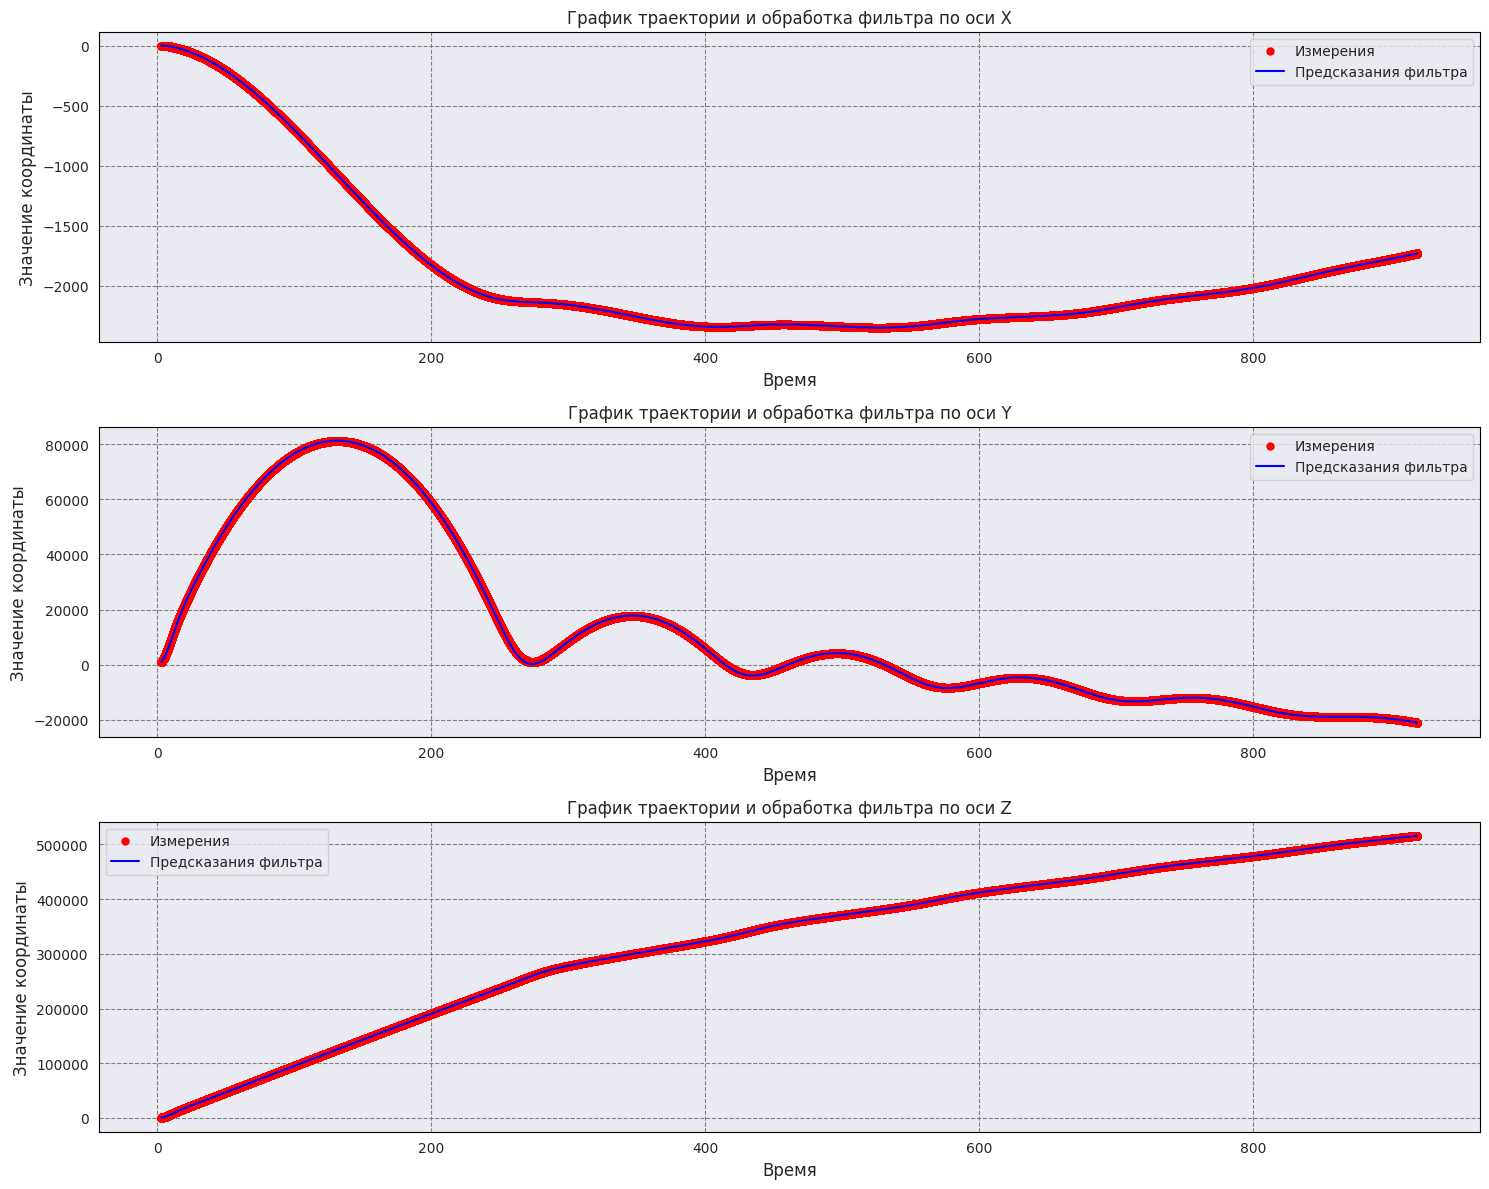

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

ax[0].scatter(new_mzsk_coords.Time,
              new_mzsk_coords.x_mzsk,
              label = 'Измерения',
              color='red',
              linewidths=0.01)
ax[0].plot(new_mzsk_coords.Time,
           trajectory_kf[:, 0],
           label='Предсказания фильтра',
           color='blue')
ax[0].grid(True)
ax[0].set_title('График траектории и обработка фильтра по оси Х')
ax[0].set_xlabel('Время', size=12)
ax[0].set_ylabel('Значение координаты', size=12)
ax[0].legend()

ax[1].scatter(new_mzsk_coords.Time,
              new_mzsk_coords.y_mzsk,
              label = 'Измерения',
              color='red',
              linewidths=0.01)
ax[1].plot(new_mzsk_coords.Time,
              trajectory_kf[:, 1],
              label='Предсказания фильтра',
              color='blue')
ax[1].grid(True)
ax[1].set_title('График траектории и обработка фильтра по оси Y')
ax[1].set_xlabel('Время', size=12)
ax[1].set_ylabel('Значение координаты', size=12)
ax[1].legend()

ax[2].scatter(new_mzsk_coords.Time,
              new_mzsk_coords.z_mzsk,
              label = 'Измерения',
              color='red',
              linewidths=0.01)
ax[2].plot(new_mzsk_coords.Time,
              trajectory_kf[:, 2],
              label='Предсказания фильтра',
              color='blue')
ax[2].grid(True)
ax[2].set_title('График траектории и обработка фильтра по оси Z')
ax[2].set_xlabel('Время', size=12)
ax[2].set_ylabel('Значение координаты', size=12)
ax[2].legend()

plt.tight_layout()
plt.show()

### $\text {Let`s see residuals}$

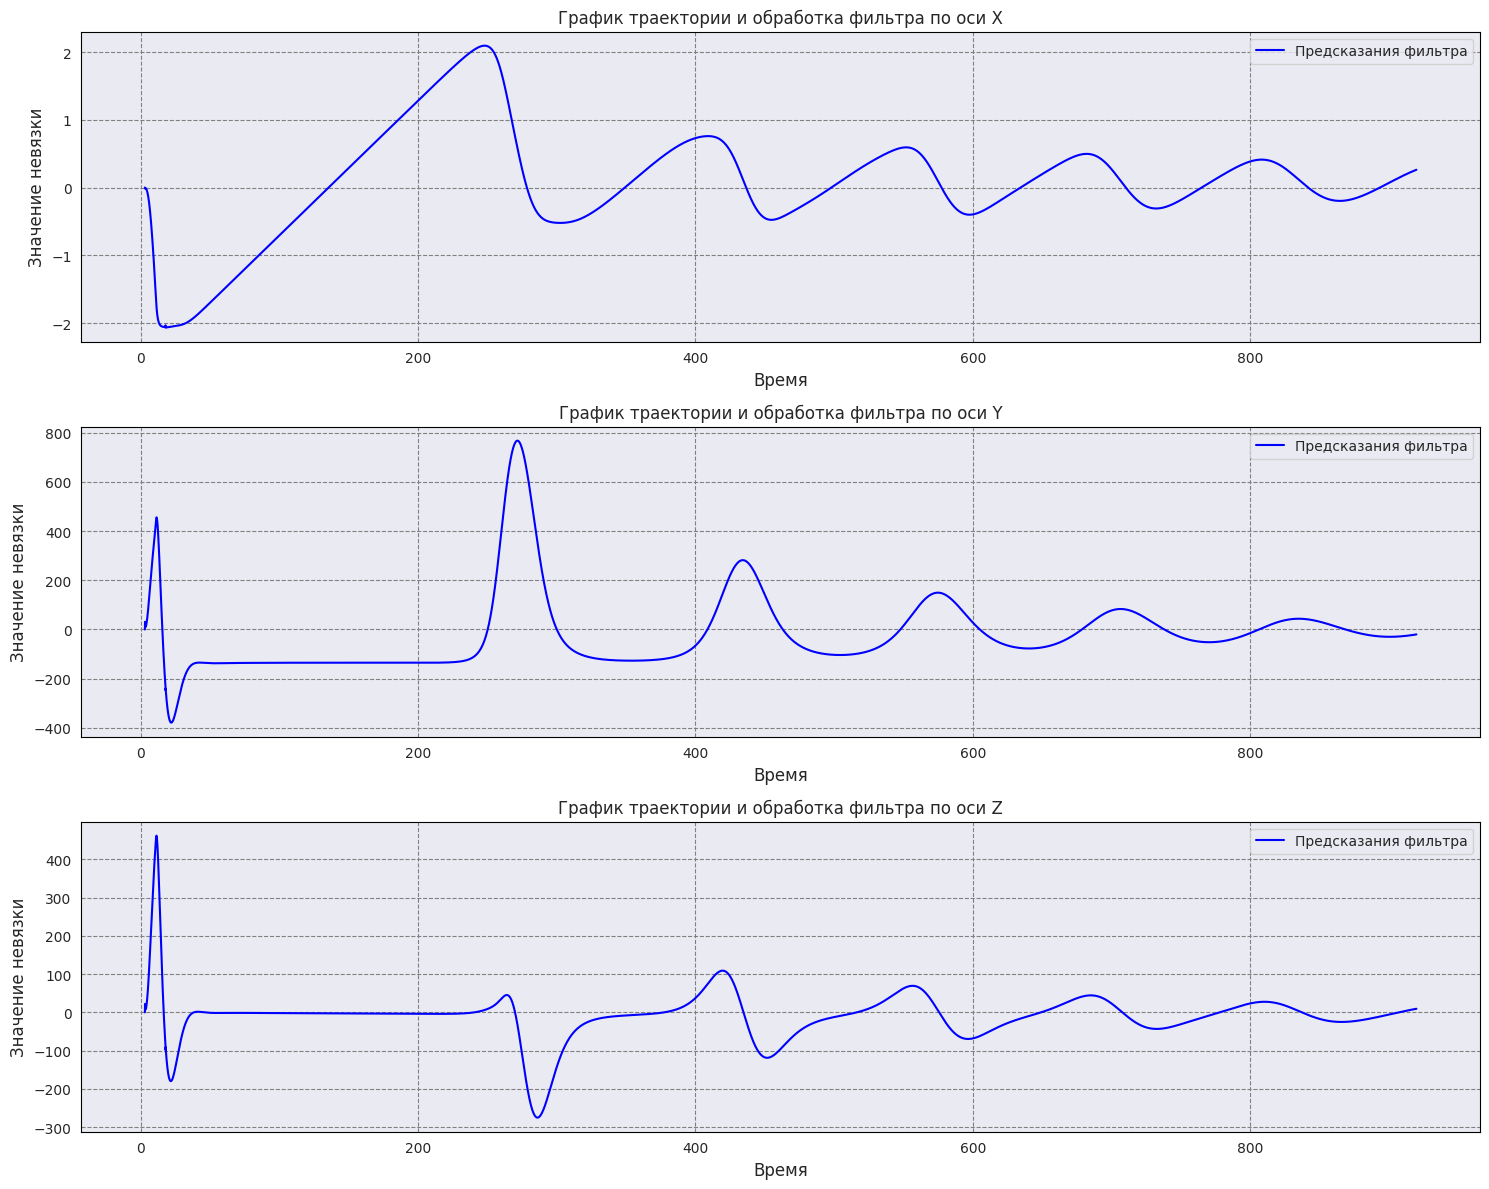

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

ax[0].plot(new_mzsk_coords.Time,
           residuals[:, 0],
           label='Предсказания фильтра',
           color='blue')

ax[0].grid(True)
ax[0].set_title('График траектории и обработка фильтра по оси Х')
ax[0].set_xlabel('Время', size=12)
ax[0].set_ylabel('Значение невязки', size=12)
ax[0].legend()

ax[1].plot(new_mzsk_coords.Time,
           residuals[:, 1],
           label='Предсказания фильтра',
           color='blue')

ax[1].grid(True)
ax[1].set_title('График траектории и обработка фильтра по оси Y')
ax[1].set_xlabel('Время', size=12)
ax[1].set_ylabel('Значение невязки', size=12)
ax[1].legend()

ax[2].plot(new_mzsk_coords.Time,
           residuals[:, 2],
           label='Предсказания фильтра',
           color='blue')

ax[2].grid(True)
ax[2].set_title('График траектории и обработка фильтра по оси Z')
ax[2].set_xlabel('Время', size=12)
ax[2].set_ylabel('Значение невязки', size=12)
ax[2].legend()

plt.tight_layout()
plt.show()

## $\text {Conclusions:}$
### $\text {As we can see, standart Kalman filter works bad with nonlinear system (axis y), since this architecture uses linear equations}$